In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
pip install xlsxwriter

  Obtaining dependency information for xlsxwriter from https://files.pythonhosted.org/packages/9b/07/df054f7413bdfff5e98f75056e4ed0977d0c8716424011fac2587864d1d3/XlsxWriter-3.2.2-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/165.1 kB ? eta -:--:--
   -- ------------------------------------- 10.2/165.1 kB ? eta -:--:--
   ------- ------------------------------- 30.7/165.1 kB 330.3 kB/s eta 0:00:01
   ---------------- ---------------------- 71.7/165.1 kB 563.7 kB/s eta 0:00:01
   ------------------------- ------------ 112.6/165.1 kB 731.4 kB/s eta 0:00:01
   -------------------------------------- 165.1/165.1 kB 763.0 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [21]:
# Đọc file Excel
file_path = "C:/Users/Admin/OneDrive/Tài liệu/Data analysis project pratice/Alomix/Sales Data.xlsx"
xls = pd.ExcelFile(file_path)
orders_df = pd.read_excel(xls, sheet_name='orders')
order_products_df = pd.read_excel(xls, sheet_name='order_products')

ValueError: Worksheet named 'orders' not found

In [20]:
# Gộp dữ liệu từ hai bảng
merged_df = pd.merge(order_products_df, orders_df, on="order_id", how="left")

In [13]:
# Chuyển đổi kiểu dữ liệu thời gian
merged_df["created_at"] = pd.to_datetime(merged_df["created_at"], errors="coerce")
merged_df["sent_at"] = pd.to_datetime(merged_df["sent_at"], errors="coerce")
merged_df["receive_at"] = pd.to_datetime(merged_df["receive_at"], errors="coerce")

In [14]:
# 1. Top 5 nhân viên có doanh số cao nhất
sales_by_employee = (
    merged_df.groupby("sales_employee")["retail_price"].sum().reset_index()
).sort_values(by="retail_price", ascending=False).head(5)

# 2. Top 5 khu vực có số đơn hàng giao thành công nhiều nhất
delivered_orders = merged_df[merged_df["status"] == "Delivered"]
orders_by_province = (
    delivered_orders.groupby("province")["order_id"].nunique().reset_index()
).sort_values(by="order_id", ascending=False).head(5)

# 3. Top 5 khu vực có thời gian giao hàng trung bình nhanh nhất
delivered_orders["delivery_time"] = (
    delivered_orders["receive_at"] - delivered_orders["sent_at"]
).dt.total_seconds() / 3600
delivery_time_by_province = (
    delivered_orders.groupby("province")["delivery_time"].mean().reset_index()
).sort_values(by="delivery_time", ascending=True).head(5)

# 4. Top 5 sản phẩm có tỷ lệ hoàn hàng cao nhất
total_orders_by_product = merged_df.groupby("display_id")["order_id"].nunique()
returned_orders_by_product = merged_df[merged_df["status"] == "Returned"].groupby("display_id")["order_id"].nunique()
return_rate = (returned_orders_by_product / total_orders_by_product).fillna(0).reset_index()
return_rate.columns = ["display_id", "return_rate"]
return_rate = return_rate.sort_values(by="return_rate", ascending=False).head(5)

C:\Users\Admin\AppData\Local\Temp\ipykernel_9664\4010950462.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivered_orders["delivery_time"] = (


In [17]:
# Xuất kết quả
output_path = "C:/Users/Admin/OneDrive/Tài liệu/Data analysis project pratice/Alomix/Sales Data.xlsx"
with pd.ExcelWriter(output_path, engine="xlsxwriter") as writer:
    sales_by_employee.to_excel(writer, sheet_name="Top 5 Employees", index=False)
    orders_by_province.to_excel(writer, sheet_name="Top 5 Provinces Orders", index=False)
    delivery_time_by_province.to_excel(writer, sheet_name="Top 5 Fastest Provinces", index=False)
    return_rate.to_excel(writer, sheet_name="Top 5 Returned Products", index=False)

C:\Users\Admin\AppData\Local\Temp\ipykernel_9664\866898997.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='retail_price', y='sales_employee', data=sales_by_employee, palette='viridis')


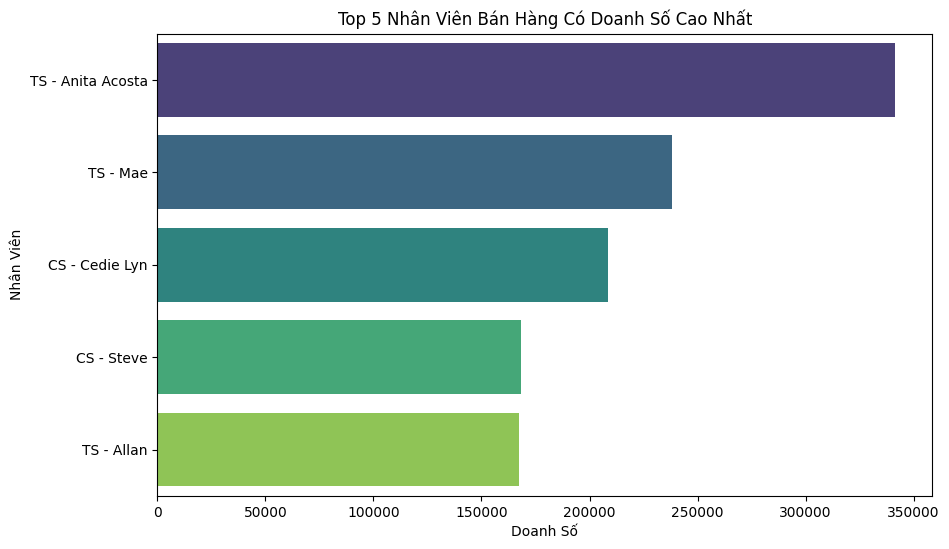

In [22]:
# Trực quan hóa dữ liệu
plt.figure(figsize=(10,6))
sns.barplot(x='retail_price', y='sales_employee', data=sales_by_employee, palette='viridis')
plt.title("Top 5 Nhân Viên Bán Hàng Có Doanh Số Cao Nhất")
plt.xlabel("Doanh Số")
plt.ylabel("Nhân Viên")
plt.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_9664\1076269215.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='order_id', y='province', data=orders_by_province, palette='coolwarm')


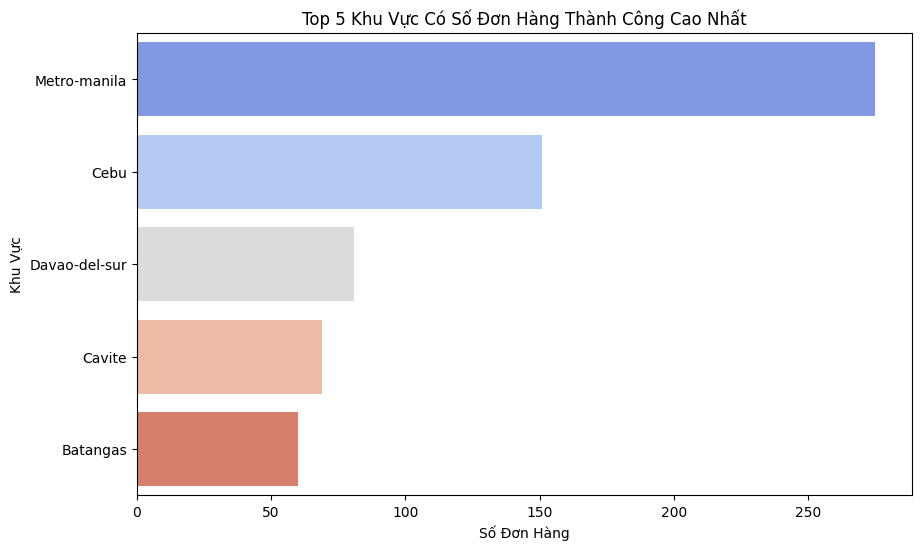

In [23]:
plt.figure(figsize=(10,6))
sns.barplot(x='order_id', y='province', data=orders_by_province, palette='coolwarm')
plt.title("Top 5 Khu Vực Có Số Đơn Hàng Thành Công Cao Nhất")
plt.xlabel("Số Đơn Hàng")
plt.ylabel("Khu Vực")
plt.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_9664\3335485314.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='delivery_time', y='province', data=delivery_time_by_province, palette='Blues_r')


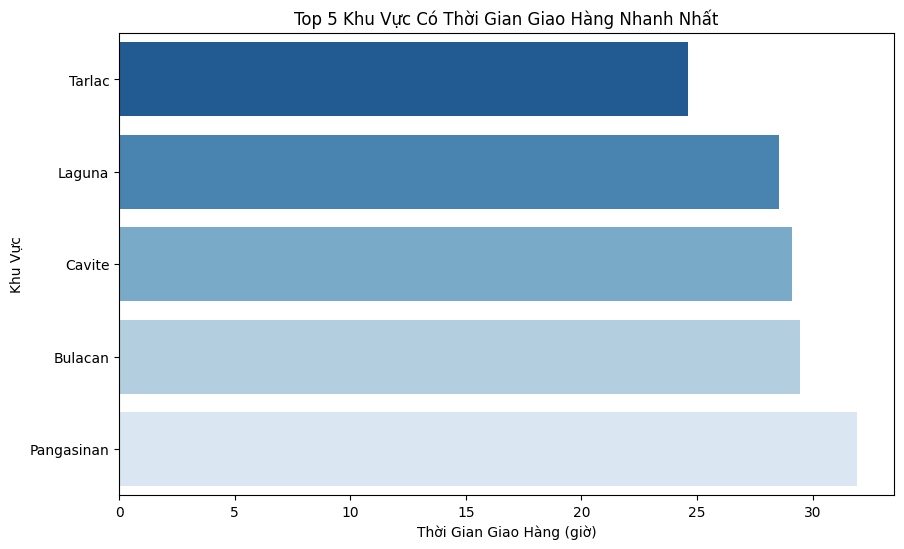

In [24]:
plt.figure(figsize=(10,6))
sns.barplot(x='delivery_time', y='province', data=delivery_time_by_province, palette='Blues_r')
plt.title("Top 5 Khu Vực Có Thời Gian Giao Hàng Nhanh Nhất")
plt.xlabel("Thời Gian Giao Hàng (giờ)")
plt.ylabel("Khu Vực")
plt.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_9664\1915523385.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='return_rate', y='display_id', data=return_rate, palette='Reds_r')


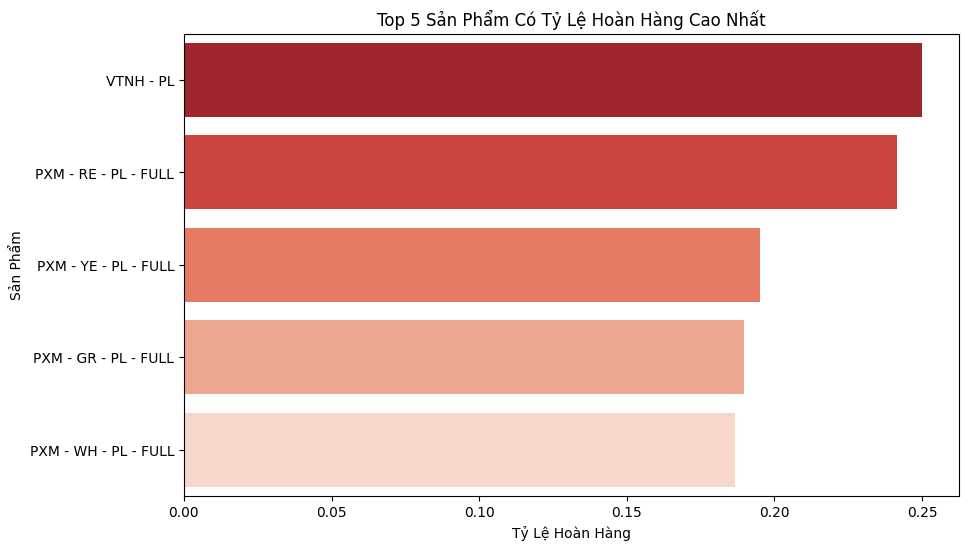

In [25]:
plt.figure(figsize=(10,6))
sns.barplot(x='return_rate', y='display_id', data=return_rate, palette='Reds_r')
plt.title("Top 5 Sản Phẩm Có Tỷ Lệ Hoàn Hàng Cao Nhất")
plt.xlabel("Tỷ Lệ Hoàn Hàng")
plt.ylabel("Sản Phẩm")
plt.show()